## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 256
epochs = 50

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=1024, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=num_classes, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    print(model.summary())
    return model

model = build_mlp()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[es,mc])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9302 - acc: 0.2983 - val_loss: 1.7906 - val_acc: 0.3498

Epoch 00001: val_acc improved from -inf to 0.34980, saving model to best_model.h5
Epoch 2/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.7114 - acc: 0.3837 - val_loss: 1.6720 - val_acc: 0.3939

Epoch 00002: val_acc improved from 0.34980 to 0.39390, saving model to best_model.h5
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6130 - acc: 0.4228 - val_loss: 1.5887 - val_acc: 0.4380

Epoch 00003: val_acc improved from 0.39390 to 0.43800, saving model to best_model.h5
Epoch 4/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5506 - acc: 0.4454 - val_loss: 1.5025 - val_acc: 0.4619

Epoch 00004: val_acc improved from 0.43800 to 0.46190, saving model to best_model.h5
Epoch 5/50
50000/50000 [==============================] - 1s 

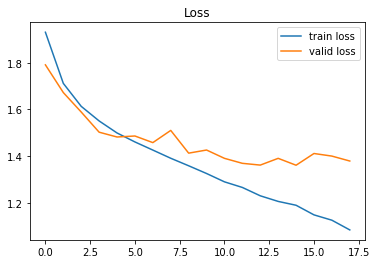

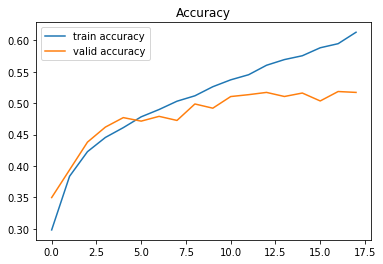

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()